<a href="https://colab.research.google.com/github/AlvinChiew/MachineLearning/blob/main/Sklearn_Classifier_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('ggplot')

# Load and Pre-Process data

In [3]:
data_obj = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data_obj.data, data_obj.target,
                                                    stratify=data_obj.target, 
                                                    random_state=0)

# Modeling

In [4]:
# storage of results from multiple k-value (predict with k amount of neighbouring data point)
train_acc = []
test_acc = []

k_range = range(1,11)       # experiment k-value from 1 to 10; 

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train,y_train))
    test_acc.append(model.score(X_test,y_test))

# Plot Result

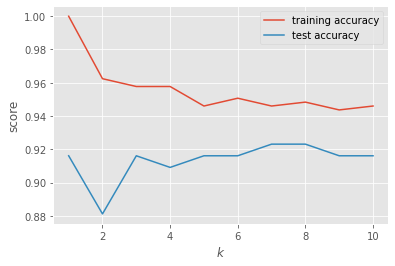

In [5]:
plt.plot(k_range, train_acc)
plt.plot(k_range, test_acc)
plt.xlabel(r'$k$')
plt.ylabel('score')
plt.legend(['training accuracy', 'test accuracy'])
# pl.savefig('result.png')
plt.show()

# Best : k=7

# Extra: Plot euclidean distances in 2D data

In [7]:
!wget https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/gen_data.py

--2020-12-25 07:47:24--  https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/gen_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1494 (1.5K) [text/plain]
Saving to: ‘gen_data.py’

gen_data.py         100%[===================>]   1.46K  --.-KB/s    in 0s      

2020-12-25 07:47:24 (38.0 MB/s) - ‘gen_data.py’ saved [1494/1494]



In [10]:
import numpy as np
from sklearn.metrics import euclidean_distances

from gen_data import make_binary

In [38]:
k = 3

X,y = make_binary()
X_test = np.array([[8, 3], [10, 4], [10.5, 2]])     # Sample coordinates to show how KNN works

In [43]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X,y)
model.predict(X_test)

# Result of prediction

array([0, 1, 0])

In [22]:
X.shape

(26, 2)

In [39]:
dist = euclidean_distances(X, X_test)                                   # shape = 26, 3; return distance from each coordinate in X to each coordinate in X_test, split by rows of X
l =  [sorted(list(zip(dist[:,i], X))) for i in range(len(X_test))]      # return pairs of distance and X coordinates, split by array of X_test

In [31]:
print(dist.shape)
print(len(l))

(26, 3)
3


In [29]:
l[0]

[(2.5307822386943966, array([9.96346605, 4.59676542])),
 (4.385897421401969, array([11.0329545 , -0.16816717])),
 (4.175148592310075, array([11.54155807,  5.21116083])),
 (1.6131658562877547, array([8.69289001, 1.54322016])),
 (1.2913363667652042, array([8.1062269 , 4.28695977])),
 (1.8326299839256937, array([8.30988863, 4.80623966])),
 (4.262056258084361, array([11.93027136,  4.64866327])),
 (3.6133844293088435, array([ 9.67284681, -0.20283165])),
 (2.1623595006001746, array([8.34810316, 5.13415623])),
 (1.6227552469734252, array([8.67494727, 4.47573059])),
 (2.4013356766795035, array([9.17748385, 5.09283177])),
 (2.305523409823315, array([10.24028948,  2.45544401])),
 (1.662561256741852, array([8.68937095, 1.48709629])),
 (3.754961430333781, array([ 8.92229526, -0.63993225])),
 (1.9996663275572788, array([9.49123469, 4.33224792])),
 (2.4756708260244107, array([9.25694192, 5.13284858])),
 (1.8525060173206402, array([7.99815287, 4.8525051 ])),
 (1.7142377331741063, array([8.18378052, 1

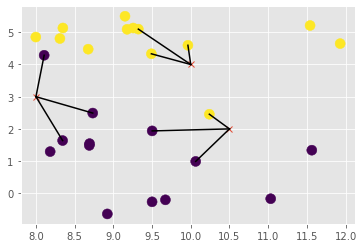

In [40]:
plt.scatter(X[:,0],X[:,1], c=y, s=100, cmap=plt.get_cmap('viridis'))            # 0 = purple; 1 = yellow
plt.plot(X_test[:,0], X_test[:,1], 'x')
for i in range(k):
    plt.plot([X_test[0,0], l[0][i][1][0]],[X_test[0,1],l[0][i][1][1]], 'k-')
    plt.plot([X_test[1,0], l[1][i][1][0]],[X_test[1,1],l[1][i][1][1]], 'k-')
    plt.plot([X_test[2,0], l[2][i][1][0]],[X_test[2,1],l[2][i][1][1]], 'k-')
plt.show()

#   Result matches! [0,1,0]